#### We are taking here champagne sales dataset and forecast the sales.

In [8]:
import numpy as np
import pandas as pd

import statsmodels.api as sm   # for ARIMA model

import matplotlib.pyplot as plt
%matplotlib inline

In [9]:
df = pd.read_csv('perrin-freres-monthly-champagne.csv')
df.head()

,Month,Perrin Freres monthly champagne sales millions ?64-?72
0,1964-01,2815.0
1,1964-02,2672.0
2,1964-03,2755.0
3,1964-04,2721.0
4,1964-05,2946.0


In [10]:
df.columns

Index(['Month', 'Perrin Freres monthly champagne sales millions ?64-?72'], dtype='object')

In [11]:
# Now we 1st replace name of 2nd column which is so big and last rows of dataset has NaN values we going to replace it.

df.columns = ['Month', 'Sales per Month']         # 'Sales per Month'  as dependent feature

df.drop(105, axis=0, inplace=True)

In [12]:
# Now we convert this 'Month' column into date and then make this column as index

df['Month'] = pd.to_datetime(df['Month'])    # date-column

df.set_index('Month', inplace=True)        # setting as index

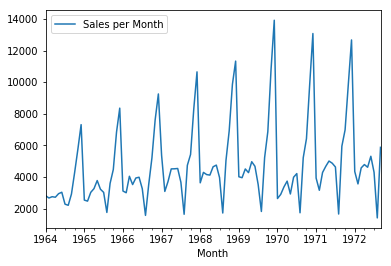

In [13]:
df.plot()      # shows like non-seasonal data

In [16]:
# Now we convert non-seasonal into seasonal data then we apply ARIMA model.

model = sm.tsa.statespace.SARIMAX(df['Sales per Month'], order=(1, 0, 0), seasonal_order=(1,1,1,12))

rsults = model.fit()   # fitting

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


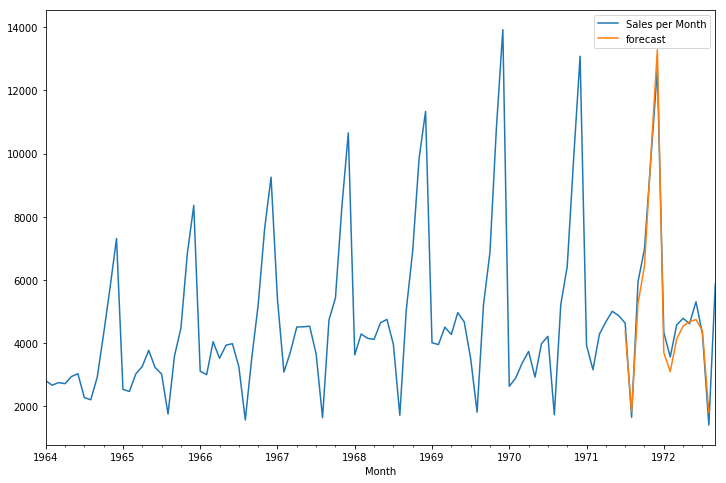

In [17]:
df['forecast'] = rsults.predict(start=90, end=103, dynamic=True)    # start= and end=  are rows of data 

df[['Sales per Month', 'forecast']].plot(figsize=(12,8))      # plotting it and You can see it almost predicted over the line.

### Now we predict for next 24 months

In [18]:
from pandas.tseries.offsets import DateOffset             # 1st creating dateoffset

future_dates = [df.index[-1]+ DateOffset(months=x) for x in range(0,24)]   # range is just 2 years 

In [19]:
future_data_df = pd.DataFrame(index=future_dates[1:], columns=df.columns)  # then converting into Dataframe

In [20]:
# future_data_df       # Now we have dataset of 24 months

In [21]:
# Now we concatenate this dataset with previous one

future_df = pd.concat([df, future_data_df])

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:320: FutureWarning: Creating a DatetimeIndex by passing range endpoints is deprecated.  Use `pandas.date_range` instead.
  freq=base_index.freq)


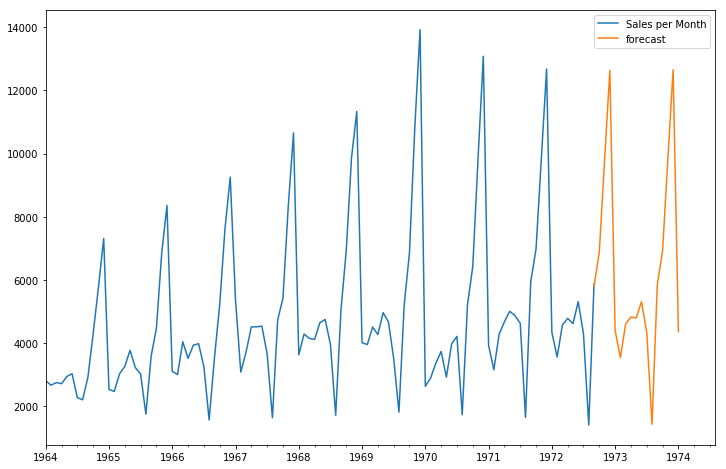

In [22]:
future_df['forecast'] = rsults.predict(start=104, end=120, dynamic=True)

future_df[['Sales per Month', 'forecast']].plot(figsize=(12,8))